In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

موضوع مقاله :
Machine learning can predict survival of
patients with heart failure from serum
creatinine and ejection fraction alone

Abstract
Background: Cardiovascular diseases kill approximately 17 million people globally every year, and they mainly
exhibit as myocardial infarctions and heart failures. Heart failure (HF) occurs when the heart cannot pump enough
blood to meet the needs of the body.
Available electronic medical records of patients quantify symptoms, body features, and clinical laboratory test values,
which can be used to perform biostatistics analysis aimed at highlighting patterns and correlations otherwise
undetectable by medical doctors. Machine learning, in particular, can predict patients’ survival from their data and can
individuate the most important features among those included in their medical records.
Methods: In this paper, we analyze a dataset of 299 patients with heart failure collected in 2015. We apply several
machine learning classifiers to both predict the patients survival, and rank the features corresponding to the most
important risk factors. We also perform an alternative feature ranking analysis by employing traditional biostatistics
tests, and compare these results with those provided by the machine learning algorithms. Since both feature ranking
approaches clearly identify serum creatinine and ejection fraction as the two most relevant features, we then build the
machine learning survival prediction models on these two factors alone.
Results: Our results of these two-feature models show not only that serum creatinine and ejection fraction are
sufficient to predict survival of heart failure patients from medical records, but also that using these two features alone
can lead to more accurate predictions than using the original dataset features in its entirety. We also carry out an
analysis including the follow-up month of each patient: even in this case, serum creatinine and ejection fraction are
the most predictive clinical features of the dataset, and are sufficient to predict patients’ survival.
Conclusions: This discovery has the potential to impact on clinical practice, becoming a new supporting tool for
physicians when predicting if a heart failure patient will survive or not. Indeed, medical doctors aiming at
understanding if a patient will survive after heart failure may focus mainly on serum creatinine and ejection fraction.

In [2]:
datasets = pd.read_csv('heart_failure_clinical_records_dataset.csv')
datasets

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


با استفاده از دستور زیر ستر و ستون دیتاست را بررسی میکنیم

In [3]:
datasets.shape

(299, 13)

در سه سل زیر ما سه تا از ستون ها را حدف میکنیم
sex , age, time
زیرا در مقاله هم گفته بود که تشخیص ما بر اساس این سه تا ستون نمی باشد

In [4]:
datasets.drop(['sex'], axis=1, inplace=True)
datasets

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,280,0


In [5]:
datasets.drop(['age'], axis=1, inplace=True)
datasets

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
0,0,582,0,20,1,265000.00,1.9,130,0,4,1
1,0,7861,0,38,0,263358.03,1.1,136,0,6,1
2,0,146,0,20,0,162000.00,1.3,129,1,7,1
3,1,111,0,20,0,210000.00,1.9,137,0,7,1
4,1,160,1,20,0,327000.00,2.7,116,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1,270,0
295,0,1820,0,38,0,270000.00,1.2,139,0,271,0
296,0,2060,1,60,0,742000.00,0.8,138,0,278,0
297,0,2413,0,38,0,140000.00,1.4,140,1,280,0


In [6]:
datasets.drop(['time'], axis=1, inplace=True)
datasets

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
0,0,582,0,20,1,265000.00,1.9,130,0,1
1,0,7861,0,38,0,263358.03,1.1,136,0,1
2,0,146,0,20,0,162000.00,1.3,129,1,1
3,1,111,0,20,0,210000.00,1.9,137,0,1
4,1,160,1,20,0,327000.00,2.7,116,0,1
...,...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1,0
295,0,1820,0,38,0,270000.00,1.2,139,0,0
296,0,2060,1,60,0,742000.00,0.8,138,0,0
297,0,2413,0,38,0,140000.00,1.4,140,1,0


در این بخش 
normallize
را انجام میدهیم 
سپس پس از انجام تابع نرمالسازی را فراوانی میکنیم.

In [7]:
def min_max_normallize(dataset):
    min_val = np.min(dataset, axis=0)
    max_val = np.max(dataset, axis=0)
    normal = (dataset - min_val) / (max_val - min_val)
    return normal

In [8]:
dataset = min_max_normallize(datasets)
dataset

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
0,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,0.0,1.0
1,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,0.0,1.0
2,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,0.0,1.0
4,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
294,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,0.0
295,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0
296,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0
297,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,0.0


در این نرمالسازی تمام اعدادمان بین صفر و یک قرار میگیرد و کار با آن دیتاها راحت تر میشود.

In [9]:
datasets = pd.get_dummies(datasets)
datasets

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
0,0,582,0,20,1,265000.00,1.9,130,0,1
1,0,7861,0,38,0,263358.03,1.1,136,0,1
2,0,146,0,20,0,162000.00,1.3,129,1,1
3,1,111,0,20,0,210000.00,1.9,137,0,1
4,1,160,1,20,0,327000.00,2.7,116,0,1
...,...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1,0
295,0,1820,0,38,0,270000.00,1.2,139,0,0
296,0,2060,1,60,0,742000.00,0.8,138,0,0
297,0,2413,0,38,0,140000.00,1.4,140,1,0


دیتاستمان را تبدیل میکنیم به دریتا فریم

In [10]:
df = pd.DataFrame(datasets)
df

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
0,0,582,0,20,1,265000.00,1.9,130,0,1
1,0,7861,0,38,0,263358.03,1.1,136,0,1
2,0,146,0,20,0,162000.00,1.3,129,1,1
3,1,111,0,20,0,210000.00,1.9,137,0,1
4,1,160,1,20,0,327000.00,2.7,116,0,1
...,...,...,...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1,143,1,0
295,0,1820,0,38,0,270000.00,1.2,139,0,0
296,0,2060,1,60,0,742000.00,0.8,138,0,0
297,0,2413,0,38,0,140000.00,1.4,140,1,0


با استفاده از کتابخانه 
plot
تبدیل میکنیم به نمودار تا راحت تر بتوانیم دیتا ست را ببینیم

array([[<Axes: xlabel='anaemia', ylabel='anaemia'>,
        <Axes: xlabel='creatinine_phosphokinase', ylabel='anaemia'>,
        <Axes: xlabel='diabetes', ylabel='anaemia'>,
        <Axes: xlabel='ejection_fraction', ylabel='anaemia'>,
        <Axes: xlabel='high_blood_pressure', ylabel='anaemia'>,
        <Axes: xlabel='platelets', ylabel='anaemia'>,
        <Axes: xlabel='serum_creatinine', ylabel='anaemia'>,
        <Axes: xlabel='serum_sodium', ylabel='anaemia'>,
        <Axes: xlabel='smoking', ylabel='anaemia'>,
        <Axes: xlabel='DEATH_EVENT', ylabel='anaemia'>],
       [<Axes: xlabel='anaemia', ylabel='creatinine_phosphokinase'>,
        <Axes: xlabel='creatinine_phosphokinase', ylabel='creatinine_phosphokinase'>,
        <Axes: xlabel='diabetes', ylabel='creatinine_phosphokinase'>,
        <Axes: xlabel='ejection_fraction', ylabel='creatinine_phosphokinase'>,
        <Axes: xlabel='high_blood_pressure', ylabel='creatinine_phosphokinase'>,
        <Axes: xlabel='platelets',

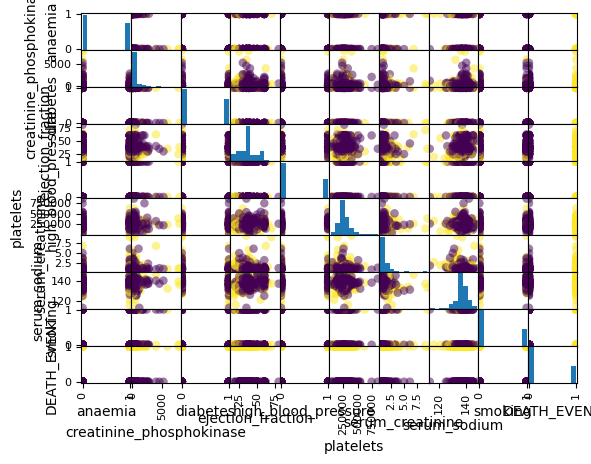

In [11]:
pd.plotting.scatter_matrix(df, c=df.DEATH_EVENT, s=150)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

در اینجا 
knn 
را بر روی دیتاست میزنیم و تنطیمات را درجه دو منهتن قرار میدهیم


In [13]:
Knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', p=2)

 ما در knn بخش لرن شدن نداریم و بصورت یکجا اعمال تست و ترین را انجام میدهیم

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df.iloc[:, :7]
y = df.iloc[:, 9:]
x

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine
0,0,582,0,20,1,265000.00,1.9
1,0,7861,0,38,0,263358.03,1.1
2,0,146,0,20,0,162000.00,1.3
3,1,111,0,20,0,210000.00,1.9
4,1,160,1,20,0,327000.00,2.7
...,...,...,...,...,...,...,...
294,0,61,1,38,1,155000.00,1.1
295,0,1820,0,38,0,270000.00,1.2
296,0,2060,1,60,0,742000.00,0.8
297,0,2413,0,38,0,140000.00,1.4


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
Knn.fit(x_train, y_train)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan')

:نتایج بدست آمده 

In [18]:
Knn.score(x_test, y_test)

0.6777777777777778

In [19]:
neighbors = np.arange(1, 30)
train_acc = np.empty(len(neighbors))
test_acc = np.empty(len(neighbors))

In [20]:
for i, k in enumerate(neighbors):
    Knn_model = KNeighborsClassifier(n_neighbors=k)
    Knn_model.fit(x_train, y_train)
    train_acc[i] = Knn_model.score(x_train, y_train)
    test_acc[i] = Knn_model.score(x_test, y_test)

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

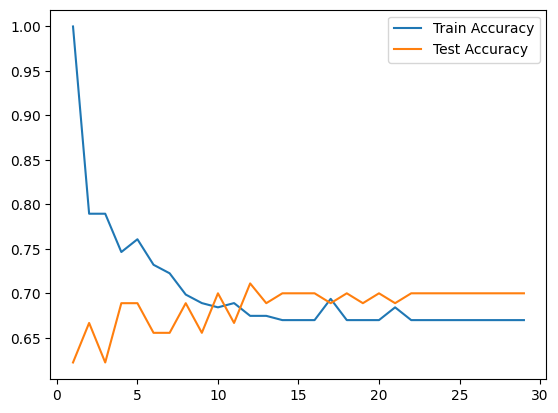

In [21]:
plt.plot(neighbors, train_acc, label='Train Accuracy')
plt.plot(neighbors, test_acc, label='Test Accuracy')
plt.legend()
plt.show()